In [2]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Global YouTube Statistics.csv', encoding='cp1252')

In [5]:
df

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,...,700000.0,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,300000.0,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
992,993,Panda,12300000,2.214684e+09,NaN,HybridPanda,2452,United Kingdom,GB,Games,...,1000.0,2006.0,Sep,11.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,SE,Games,...,100000.0,2012.0,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


1. Какой анализ этого набора данных
уже был выполнен другими
исследователями? Ваш анализ
должен опираться на то, что было
сделано ранее,
но не должен повторять работы
других людей.

Сообществом kaggle были выполнены изучения зависимости кол-ва подписчиков от заработанных денег, также были построены модели предсказания кол-ва подписчиков, изучены связь кол-ва подписчиков от категории канала, найдет топ 10 каналов
Найдены преобладающие категории в каждой из стран.

В данной работе будет произведен анализ зависимости заработанных денег от категории канала, проанализирована география самых популярных каналов. #что было сделано нами с датасетом и что делали другие люди (ноутбуки на kaggle)


2. Разберитесь с обозначениями. К
каким странам относятся данные в
столбце «Population»? Что означает
«Tertiary education enrollment»?

Population - население страны канала. В данном датасете 514 стран, такие как: Индия, США, Япония, Россия, Бразилия, Великобритания, Швеция и т.д.

Tertiary education enrollment - процент людей с высшим образованием в стране происхождения канала (Percentage of the population enrolled in tertiary education in the country).

3. Выполните очистку Вашего набора
данных. Текущая его версия
содержит значительное число
подозрительных записей, например,
данные о каналах с нулевым числом
загрузок и сотнями миллионов
подписчиков. Такого рода элементы
таблицы следует либо дополнить
данными, либо исключить из
рассмотрения.

Дополнить данные можно только проведя парсинг с ютуба, что достаточно сложно, к подозрительным каналам можно отнести более 100 штук, что ставит под сомнение валидность датасета

In [6]:
df[((df['uploads'] < 10) & (df['subscribers'] > 100000))] # сомнительные данные

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,328239523.0,14.70,270663028.0,37.090240,-95.712891
5,6,Music,119000000,0.000000e+00,NaN,Music,0,NaN,NaN,Music,...,NaN,2013.0,Sep,24.0,NaN,NaN,NaN,NaN,NaN,NaN
12,13,Gaming,93600000,0.000000e+00,NaN,Gaming,0,NaN,NaN,Games,...,NaN,2013.0,Dec,15.0,NaN,NaN,NaN,NaN,NaN,NaN
14,15,Goldmines,86900000,2.411823e+10,Film & Animation,goldmines,1,NaN,NaN,Music,...,NaN,2006.0,Aug,15.0,NaN,NaN,NaN,NaN,NaN,NaN
16,17,5-Minute Crafts,80100000,2.623679e+10,Howto & Style,5-Minute Crafts 2.0,1,United Kingdom,GB,Entertainment,...,NaN,2020.0,Jul,27.0,60.0,66834405.0,3.85,55908316.0,55.378051,-3.435973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,968,Troom Troom Indonesia,12500000,5.379684e+09,People & Blogs,TROOM TROOM INDONESIA,8,NaN,NaN,People,...,NaN,2020.0,Jul,29.0,NaN,NaN,NaN,NaN,NaN,NaN
975,976,Gustavo Parï¿½ï¿½,12400000,2.602614e+09,Comedy,GustavoParodias,9,Brazil,BR,Comedy,...,NaN,2010.0,Aug,24.0,51.3,212559417.0,12.08,183241641.0,-14.235004,-51.925280
983,984,MoniLina,12400000,1.608681e+10,Comedy,MoniLinaFamily,0,United States,US,People,...,100.0,2016.0,May,10.0,88.2,328239523.0,14.70,270663028.0,37.090240,-95.712891
985,986,TKOR,12400000,3.392023e+09,Education,TKoR,0,NaN,NaN,People,...,NaN,2006.0,Aug,16.0,NaN,NaN,NaN,NaN,NaN,NaN


Произведем фильтрацию

In [7]:
df = df[~((df['uploads'] < 10) & (df['subscribers'] > 100000))]
df

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
6,7,ýýý Kids Diana Show,112000000,9.324704e+10,People & Blogs,ýýý Kids Diana Show,1111,United States,US,Entertainment,...,NaN,2015.0,May,12.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,...,700000.0,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,300000.0,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
992,993,Panda,12300000,2.214684e+09,NaN,HybridPanda,2452,United Kingdom,GB,Games,...,1000.0,2006.0,Sep,11.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,SE,Games,...,100000.0,2012.0,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


4. Выполните дескриптивную аналитику
Вашего набора данных:

а)Спроецируйте Ваши данные на
политическую карту мира. В каких странах наибольшее число подписчиков?

In [8]:
cords = df[['Country', 'Latitude', 'Longitude']].drop_duplicates().dropna()
#создаёт новый DataFrame cords, который содержит уникальные комбинации значений из столбцов 'Country', 'Latitude' и 'Longitude',
#без дубликатов и без пропущенных значений.

In [9]:
subs = df[['subscribers', 'Country']].groupby('Country').sum().reset_index()
#в DataFrame subs будут содержаться страны и общее количество подписчиков для каждой страны

In [10]:
cords['Country']

0                     India
2             United States
7                     Japan
8                    Russia
13              South Korea
19                   Canada
23                   Brazil
31                Argentina
39           United Kingdom
44                    Chile
52              El Salvador
56                 Pakistan
60              Philippines
63                 Colombia
69                 Barbados
71                   Mexico
76     United Arab Emirates
81                    Spain
82                 Thailand
85             Saudi Arabia
117               Indonesia
132                  Turkey
151               Venezuela
158                  Kuwait
165                  Jordan
167             Netherlands
191               Australia
212                   Italy
294                 Germany
315                  France
371                  Sweden
379                 Ukraine
388                  Latvia
423             Switzerland
489                 Vietnam
503                M

In [11]:
subs.sort_values('subscribers', ascending=False).head(10) #в данных странах наибольшее число подписчиков

,Country,subscribers
43,United States,6875900000
15,India,4270200000
4,Brazil,1194900000
42,United Kingdom,837300000
24,Mexico,553600000
16,Indonesia,534100000
34,South Korea,481700000
35,Spain,385100000
30,Russia,376400000
38,Thailand,342800000


In [12]:
dff = subs.merge(cords, how='inner', on='Country') #операция слияния (merge) двух DataFrame

In [13]:
fig = px.scatter_mapbox(dff, lat="Latitude", lon="Longitude", hover_name="Country", hover_data=['subscribers'],  zoom=3, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


б) Какие страны приносят самым популярным каналам наибольший доход?


In [14]:
subs.sort_values('subscribers', ascending=False).head(10).set_index('Country')
#создается новый DataFrame, который содержит топ-10 стран по количеству подписчиков, отсортированных в порядке убывания,
#с индексом, установленным на 'Country'.

,subscribers
Country,
United States,6875900000
India,4270200000
Brazil,1194900000
United Kingdom,837300000
Mexico,553600000
Indonesia,534100000
South Korea,481700000
Spain,385100000
Russia,376400000


In [15]:
top = df.groupby('Country').agg('subscribers').max() # группируем по странам и смотрим самый большой канал по подпискам
top

Country
Andorra                  15100000
Argentina                58400000
Australia                27800000
Barbados                 41900000
Brazil                   66500000
Canada                   71600000
Chile                    48100000
China                    17600000
Colombia                 43500000
Ecuador                  14600000
Egypt                    15500000
El Salvador              46100000
Finland                  13200000
France                   22300000
Germany                  23000000
India                   245000000
Indonesia                34000000
Iraq                     17400000
Italy                    26400000
Japan                   111000000
Jordan                   30200000
Kuwait                   30500000
Latvia                   20200000
Malaysia                 17700000
Mexico                   41300000
Morocco                  14500000
Netherlands              30100000
Pakistan                 44600000
Peru                     14400000
Philip

In [16]:
top_all = df.merge(top, on=['subscribers', 'Country'], how='right') # вернулись ко всей информации о канале

In [17]:
top10 = top_all.sort_values('highest_monthly_earnings', ascending=False).head(10) #топ 10 каналов с макс кол-вом подписок в стране по доходам

In [18]:
top10

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
15,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
39,133,BETER Bï¿½ï¿½,32700000,1.918004e+10,NaN,BETER Bï¿½ï¿½,2738,Turkey,TR,Games,...,2100000.0,2012.0,Dec,12.0,23.9,8.342962e+07,13.49,63097818.0,38.963745,35.243322
43,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
27,57,HAR PAL GEO,44600000,4.113905e+10,Entertainment,HAR PAL GEO,100755,Pakistan,PK,Entertainment,...,1300000.0,2008.0,Jan,2.0,9.0,2.165653e+08,4.45,79927762.0,30.375321,69.345116
22,389,dednahype,20200000,2.091940e+10,Comedy,dednahype,1935,Latvia,LV,Comedy,...,1200000.0,2020.0,Mar,20.0,88.1,1.912789e+06,6.52,1304943.0,56.879635,24.603189
18,213,PANDA BOI,26400000,1.721160e+10,Entertainment,PANDA BOI,967,Italy,IT,Entertainment,...,2000000.0,2020.0,Dec,5.0,61.9,6.029740e+07,9.89,42651966.0,41.871940,12.567380
14,295,Tsuriki Show,23000000,3.149451e+10,Entertainment,Tsuriki Show,2905,Germany,DE,Comedy,...,800000.0,2019.0,Jul,10.0,70.2,8.313280e+07,3.04,64324835.0,51.165691,10.451526
1,32,El Reino Infantil,58400000,5.727163e+10,Music,El Reino Infantil,1510,Argentina,AR,Music,...,600000.0,2011.0,Jun,2.0,90.0,4.493871e+07,9.79,41339571.0,-38.416097,-63.616672
16,118,Jess No Limit,34000000,3.963007e+09,Entertainment,Jess No Limit,2284,Indonesia,ID,Entertainment,...,5500000.0,2017.0,Sep,7.0,36.3,2.702039e+08,4.69,151509724.0,-0.789275,113.921327
34,14,BLACKPINK,89800000,3.214460e+10,People & Blogs,BLACKPINK,543,South Korea,KR,Music,...,700000.0,2016.0,Jun,29.0,94.3,5.170910e+07,4.15,42106719.0,35.907757,127.766922


In [19]:
top10.index = top10['Youtuber'] + ' (' + top10['Country'] + ')'

In [20]:
top10.index[0]

'T-Series (India)'

Построим график кол-ва подписчиков по каналам с максимальным доходом в каждой стране

<Axes: >

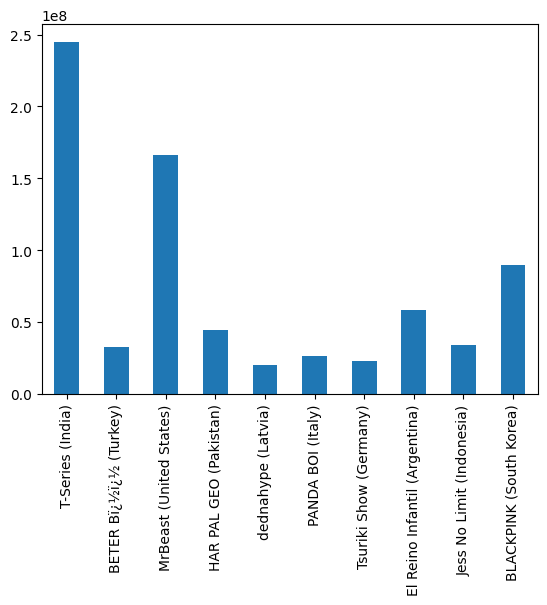

In [21]:
top10['subscribers'].plot.bar()

Посмотрим на топ 10 стран с самыми большими каналами

In [22]:
top10['Country'].reset_index(drop=True)

0            India
1           Turkey
2    United States
3         Pakistan
4           Latvia
5            Italy
6          Germany
7        Argentina
8        Indonesia
9      South Korea
Name: Country, dtype: object

In [ ]:
#построить сумму заработка блогеров по странам по топу 15 стран

<Axes: xlabel='Country'>

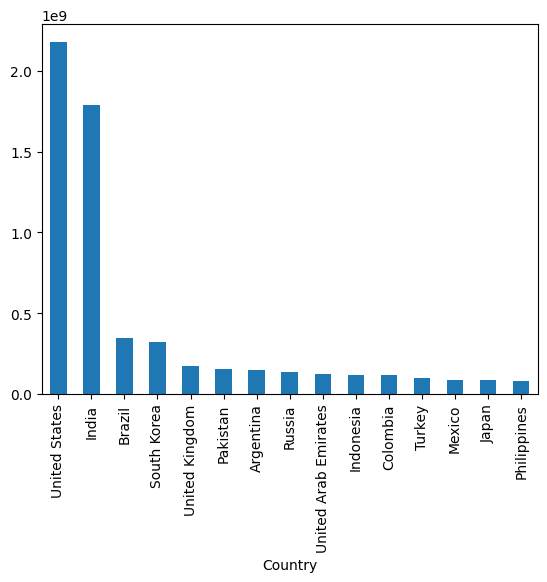

In [23]:
df.groupby('Country').agg('highest_yearly_earnings').sum().sort_values(ascending=False).head(15).plot.bar()


в)Сколько всего в наборе данных
представлено категорий и типов
каналов?



In [24]:
df['category'].drop_duplicates().shape[0]

19

В датасете содержится ошибка, и типы каналов не делятся на индивидуальные и брендов, а лишь измененно дублируют категорию канала (колонки где-то совпадают, где-то нет)

In [25]:
df['channel_type'].drop_duplicates().shape[0]

15

In [26]:
df['category'].drop_duplicates()

0                      Music
2              Entertainment
3                  Education
4                      Shows
6             People & Blogs
7                     Gaming
11                    Sports
29          Film & Animation
33           News & Politics
59                    Comedy
70                  Trailers
84     Nonprofits & Activism
91                       NaN
142            Howto & Style
143     Science & Technology
182                   Movies
275           Pets & Animals
333         Autos & Vehicles
956          Travel & Events
Name: category, dtype: object

In [27]:
df['channel_type'].drop_duplicates()

0              Music
2      Entertainment
3          Education
8             People
11            Sports
29              Film
33              News
38               NaN
44             Games
59            Comedy
63             Howto
84         Nonprofit
143             Tech
275          Animals
702            Autos
Name: channel_type, dtype: object

г) Какая связь наблюдается
между этими параметрами и
популярностью и доходностью
канала?

lowest_monthly_earnings: Самый низкий предполагаемый ежемесячный доход от канала

highest_monthly_earnings: Самый высокий предполагаемый ежемесячный доход от канала

lowest_yearly_earnings: Самый низкий предполагаемый годовой доход от канала

highest_yearly_earnings: Самый высокий предполагаемый годовой доход от канала

Возьмем среднее значение между lowest_yearly_earnings и highest_yearly_earnings и примим это значение за годовой доход

<Axes: xlabel='category'>

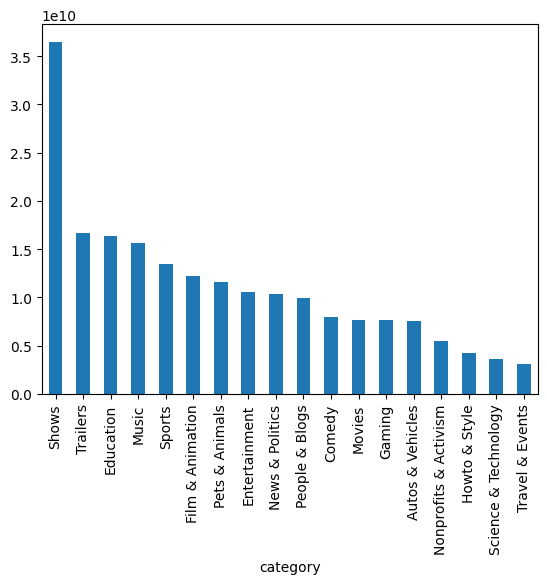

In [28]:
df.groupby('category')['video views'].mean().sort_values(ascending=False).plot.bar()
#средние значения просмотров видео для каждой категории отсортированы по убыванию

<Axes: xlabel='channel_type'>

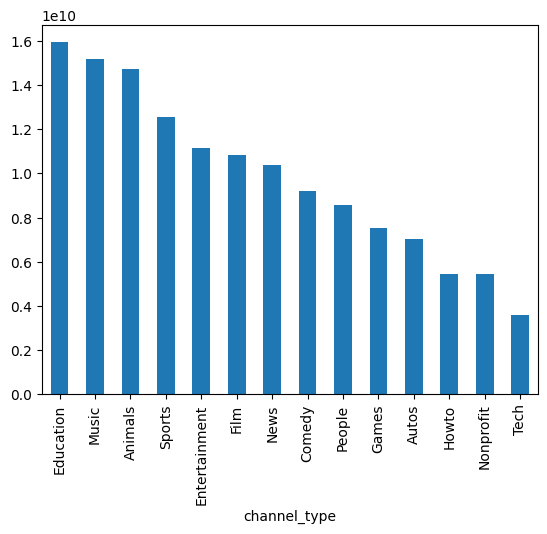

In [29]:
df.groupby('channel_type')['video views'].mean().sort_values(ascending=False).plot.bar()

Мы проанализировали связь между параметрами "просмотры видео" и категория и тип канала. Если смотреть по категории канала, то наиболее популярные по просмотрам каналы с такими категориями, как: шоу, трейлеры и образование. Если смотреть по типу канала, то наиболее популярные типы это образование, музыка и животные.

In [30]:
df[['Youtuber', 'category', 'channel_type']]

,Youtuber,category,channel_type
0,T-Series,Music,Music
2,MrBeast,Entertainment,Entertainment
3,Cocomelon - Nursery Rhymes,Education,Education
4,SET India,Shows,Entertainment
6,ýýý Kids Diana Show,People & Blogs,Entertainment
...,...,...,...
990,Natan por Aï¿,Sports,Entertainment
991,Free Fire India Official,People & Blogs,Games
992,Panda,NaN,Games
993,RobTopGames,Gaming,Games


In [53]:
df.loc['yearly_earnings'] = df[['highest_yearly_earnings', 'lowest_yearly_earnings']].mean(axis=1)

<ipython-input-53-cb5255e18417>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: xlabel='category'>

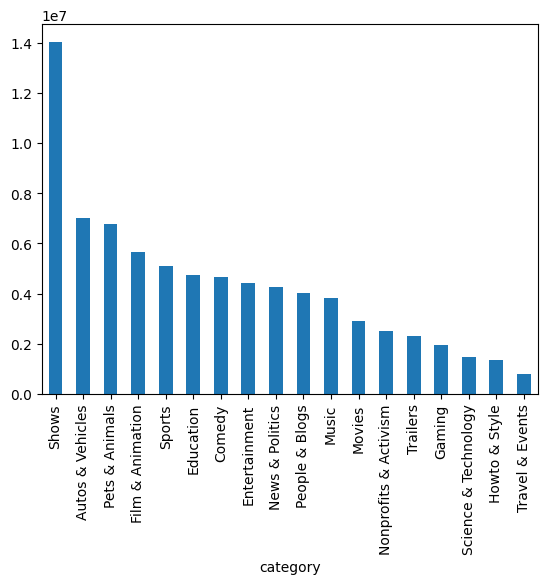

In [54]:
df.groupby('category')['yearly_earnings'].mean().sort_values(ascending=False).plot.bar()

<Axes: xlabel='channel_type'>

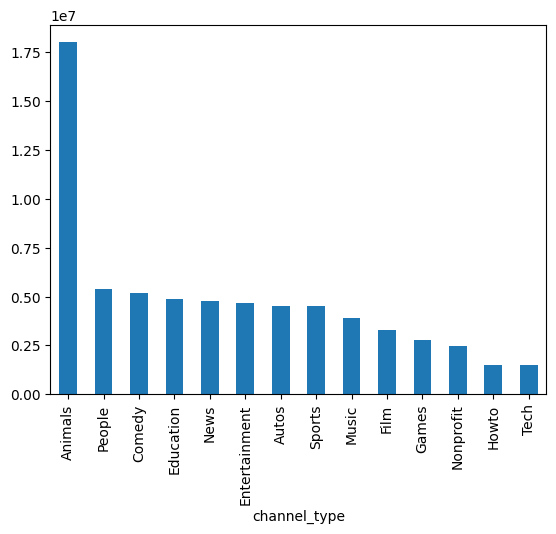

In [55]:
df.groupby('channel_type')['yearly_earnings'].mean().sort_values(ascending=False).plot.bar()

Из-за ошибки в датасете (скорее всего) и практически одинаковыми значениями между колонками category и chanel_type мы ложно приняли, что животные зарабатывают больше всего, однако если подставить колонку категория, то больше всего денег зарабатывают шоу. Это также видно из графика просмотров, что шоу пользуются наибольшим интересом пользователей сервиса. Автомобили являются следующей дорогостоящей категорией и возможно из-за этого реклама в видео стоит дороже, чем в других роликах, однако для подверждения данной гипотезы данных слишком мало. И также каналы со спортивной тематикой зарабатывают довольно много.

Если смотреть по типам каналов, то кроме животных большой среднегодовой заработок ещё у образовательных и комедийных каналов.

Посмотрим на зависимость количества видео на канале и количества подписчиков и просмотров

In [56]:
df[['subscribers', 'uploads', 'video views']].corr()

,subscribers,uploads,video views
subscribers,1.000000,0.093406,0.838381
uploads,0.093406,1.000000,0.164787
video views,0.838381,0.164787,1.000000


Можем заметить, что кол-во подписчиков и просмотров между собой имеют корреляцию, связь между ними близка к прямой линейной зависимости (корреляция близка к 1) в отличие от связи между количеством подписчиков и кол-вом загруженных видео и связи между кол-вом загруженных видео и кол-вом просмотров (число близко к 0).

Теперь посмотрим на корреляцию зарабатываемых денег и кол-ва подписчиков и просмотров используя метод Пирсона

In [35]:
df[['subscribers', 'yearly_earnings']].corr(method='pearson', numeric_only=False).iloc[0, 1]
#вычисляет корреляцию Пирсона между столбцами 'subscribers' и 'yearly_earnings'
#и извлекает значение корреляции из первой строки и второго столбца корреляционной матрицы.

0.451113647608501

Значение 0.451113647608501 указывает на умеренную положительную корреляцию между числом подписчиков и ежегодными доходами.

In [36]:
df[['video views', 'yearly_earnings']].corr(method='pearson', numeric_only=False).iloc[0, 1]

0.5612765768185963

Учитывая то, что кол-во просмотров больше определяет кол-во заработанных денег, но, однако, в разных странах цена за просмотр разная, проверим: корреляция просмотров и заработанных денег по стране будет ли выше, чем общегрупповое значение.

In [37]:
dff = df.groupby('Country')[['video views', 'yearly_earnings']].corr().dropna().iloc[1::2]['video views']

In [38]:
dff.mean()

0.4747147691922103

In [39]:
dff['Russia']

yearly_earnings   -0.00444
Name: video views, dtype: float64

In [40]:
dff['United States']

yearly_earnings    0.546734
Name: video views, dtype: float64

In [41]:
dff

Country                              
Argentina             yearly_earnings    0.546837
Australia             yearly_earnings    0.329433
Brazil                yearly_earnings    0.502382
Canada                yearly_earnings    0.874898
Chile                 yearly_earnings   -0.055499
Colombia              yearly_earnings    0.112339
Ecuador               yearly_earnings    1.000000
Egypt                 yearly_earnings    1.000000
France                yearly_earnings    0.044318
Germany               yearly_earnings    0.945898
India                 yearly_earnings    0.827795
Indonesia             yearly_earnings    0.239450
Iraq                  yearly_earnings    1.000000
Italy                 yearly_earnings    1.000000
Japan                 yearly_earnings   -0.040498
Jordan                yearly_earnings    0.230103
Mexico                yearly_earnings    0.164821
Netherlands           yearly_earnings    0.968456
Pakistan              yearly_earnings    0.996309
Philippines 

In [61]:
df[df['Country'] == 'Italy']

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude,yearly_earnings
212,213.0,PANDA BOI,26400000.0,1.721160e+10,Entertainment,PANDA BOI,967.0,Italy,IT,Entertainment,...,2020.0,Dec,5.0,61.9,60297396.0,9.89,42651966.0,41.87194,12.56738,31250000.0
900,901.0,Davie504,13000000.0,2.683298e+09,Entertainment,Davie504,838.0,Italy,IT,Entertainment,...,2011.0,May,18.0,61.9,60297396.0,9.89,42651966.0,41.87194,12.56738,744800.0


Можем видеть, что корреляция по странам сильно отличается, например, в России, где нет рекламы на ютубе, она близка к 0, в отличие от США, где она 0,54. Также есть различные выбросы по примеру Эквадора, Италии, Ирака, Сингапура и Египта, у которых в выборке всего 2 канала, и мы не можем считать данные объективными.

Итог:

Кол-во просмотров влияет на заработанные деньги, однако есть еще ряд факторов, которые могут влиять на это. В странах с высокой корреляцией стратегия увеличения просмотров, вероятно, приведет к значительному росту доходов.

В странах со средней и слабой положительной корреляцией хотя существует положительная связь между просмотрами и заработком, на доходы могут влиять и другие факторы.

В странах с отрицательной или очень слабой корреляцией увеличение просмотров не обязательно приводит к увеличению доходов. Возможно, существуют другие важные факторы, влияющие на доход, такие как специфика рынка, рекламные ставки и модели монетизации.

Данные по корреляции сильно разнятся по странам.

Посмотрим на кол-во каналов по каждой стране

In [43]:
df['Country'].value_counts()

Country
United States           300
India                   165
Brazil                   60
United Kingdom           42
Mexico                   30
Indonesia                28
Spain                    22
Thailand                 17
South Korea              17
Russia                   14
Argentina                13
Canada                   13
Philippines              12
Colombia                 11
Ukraine                   8
Saudi Arabia              8
United Arab Emirates      7
Australia                 7
Pakistan                  6
Japan                     5
Germany                   5
France                    5
Sweden                    4
Turkey                    4
Vietnam                   3
Chile                     3
Jordan                    3
Netherlands               3
Ecuador                   2
Egypt                     2
Singapore                 2
Italy                     2
Iraq                      2
Andorra                   1
Peru                      1
Finland     

Посмотрим на круговую диаграмму

In [44]:
channels_count_by_country =df['Country'].value_counts()

<Axes: ylabel='count'>

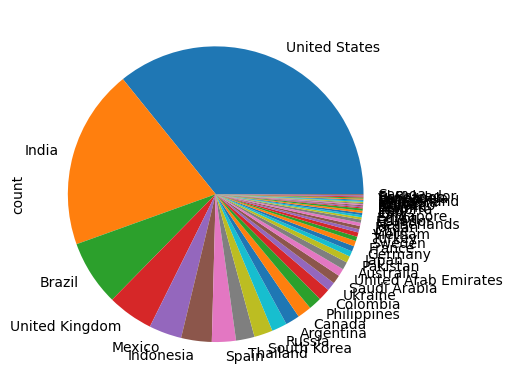

In [45]:
channels_count_by_country.plot.pie()

Сделаем график более читаемым выведя топ 5 стран, а остальные перенесем в блок другие

In [46]:
channels_count_by_country = channels_count_by_country.sort_values(ascending=False)

#the top 5
df2 = channels_count_by_country[:5].copy()

#others
others_count = channels_count_by_country[5:].sum()
new_row = pd.Series({'Others': others_count})

#combining top 5 with others
df2 = pd.concat([df2, new_row])

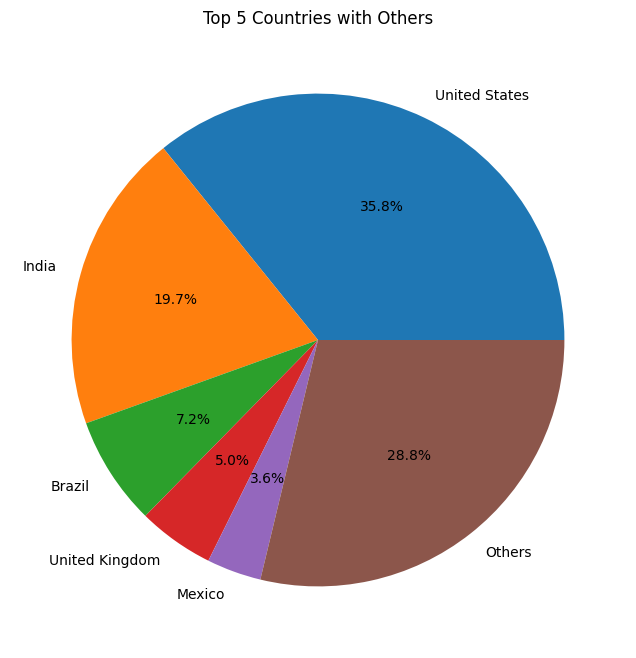

In [47]:
df2.plot.pie(y='count', labels=df2.index, autopct='%1.1f%%', figsize=(8, 8))
plt.ylabel('')  # Убрать метку оси Y
plt.title('Top 5 Countries with Others')
plt.show()

5.
А) Какие еще есть видеохостинги, какая у них статистика популярности, числа подписчиков и пр.

Нами был произведен анализ различных видеохостингов и их статистика. И был сделан вывод, что в 2023 году топ 7 видеохостингов занимали VdoCipher, YouTube, Dailymotion, Vimeo, Wistia, Vidyard, Kaltura. Подробнее про каждый видеохостинг на сайте https://www.vdocipher.com/blog/ru/video-hosting-sites/. Также существуют такие видеохостинги как TikTok и Rutube. Мы проанализировали каждый их них.

Видеоролики TikTok смотрит треть всех пользователей социальных сетей на планете. В 2024 году аудитория TikTok составляет более 1.58 млрд активных пользователей в месяц. Это означает, что 15.1% населения Земли используют TikTok каждый месяц. 20.51% интернет-пользователей мира используют TikTok ежемесячно. Аудитория TikTok в два раза меньше, чем аудитория видеохостинга YouTube.
С ноября 2021 по январь 2022 года в TikTok регистрировалось более 650 тысяч новых пользователей каждый день (это почти 8 новых аккаунтов в секунду).

Общее число подписчиков пяти крупнейших тикток-каналов составляет 747 млн человек (2024). Это примерно 52% населения Индии, самого крупного государства в мире по населению. Для сравнения общее число подписчиков пяти крупнейших каналов YouTube (2023): 902 000 000 человек (без фильтрации данных) и 844 000 000 человек с фильтрацией.

In [48]:
top_5_channels = df.head(5)
total_subscribers_top_5 = top_5_channels['subscribers'].sum()
print(f'Общее число подписчиков пяти крупнейших каналов YouTube (2023 год): {total_subscribers_top_5}')

Общее число подписчиков пяти крупнейших каналов YouTube (2023 год): 844000000


In [49]:
df

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude,yearly_earnings
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880,57600000.0
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,34350000.0
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,50350000.0
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880,46500000.0
6,7,ýýý Kids Diana Show,112000000,9.324704e+10,People & Blogs,ýýý Kids Diana Show,1111,United States,US,Entertainment,...,2015.0,May,12.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,18650000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,...,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280,14100000.0
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880,1647100.0
992,993,Panda,12300000,2.214684e+09,NaN,HybridPanda,2452,United Kingdom,GB,Games,...,2006.0,Sep,11.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973,1700.5
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,SE,Games,...,2012.0,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501,98700.0


Самый высокий рекламный охват пользователей TikTok зафиксирован в Саудовской Аравии (135%), ОАЭ (128%) и Малайзии (107%). Мировой охват TikTok составляет 21.5%. По прогнозам к 2027 году аудитория TikTok достигнет 2.25 млрд пользователей. По сравнению с Facebook* и YouTube, которым потребовалось восемь лет, чтобы набрать миллиард пользователей, TikTok сделал это за шесть лет.

За последние два года аудитория TikTok увеличилась на 210 млн пользователей. В США зарегистрировано больше всего пользователей TikTok (143.4 млн), на втором месте Индонезия (106.5 млн) и на третьем месте Бразилия – 95 млн пользователей. По данным Datareportal аудитория TikTok в России составляет 51 млн человек. Это примерно 35% населения России.


В следующей таблице перечислены 50 учётных записей TikTok с наибольшим количеством подписчиков, при этом общее количество подписчиков округлено до ближайших сотен тысяч подписчиков, а также описание каждой учётной записи и страны происхождения.

[Список самых популярных аккаунтов TikTok](https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D1%81%D0%B0%D0%BC%D1%8B%D1%85_%D0%BF%D0%BE%D0%BF%D1%83%D0%BB%D1%8F%D1%80%D0%BD%D1%8B%D1%85_%D0%B0%D0%BA%D0%BA%D0%B0%D1%83%D0%BD%D1%82%D0%BE%D0%B2_TikTok)

Здесь представлен топ-50 аккаунтов в ТикТок, статистика по кол-ву подписчиков, описанию и стране. (На фото топ-20)

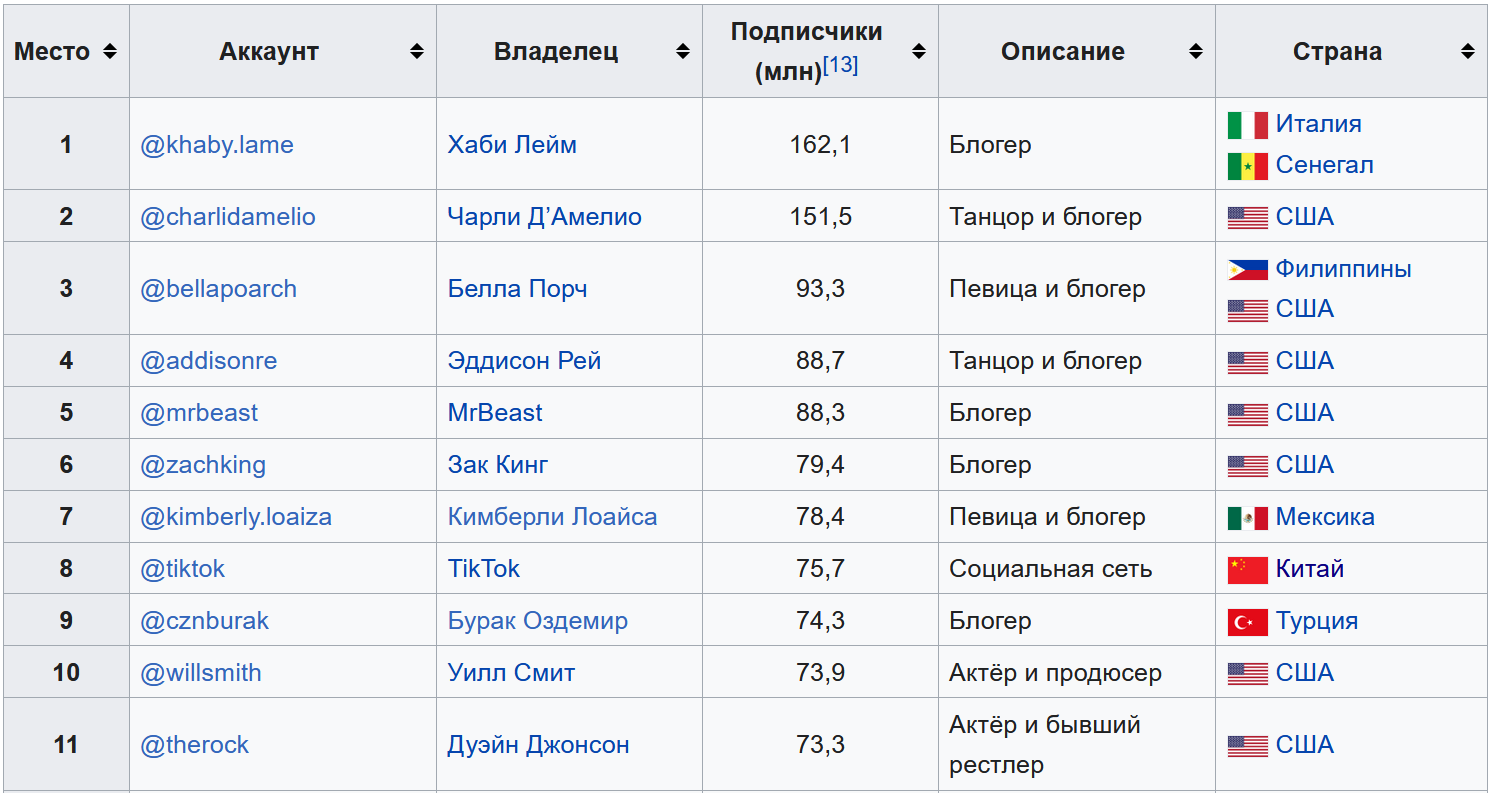

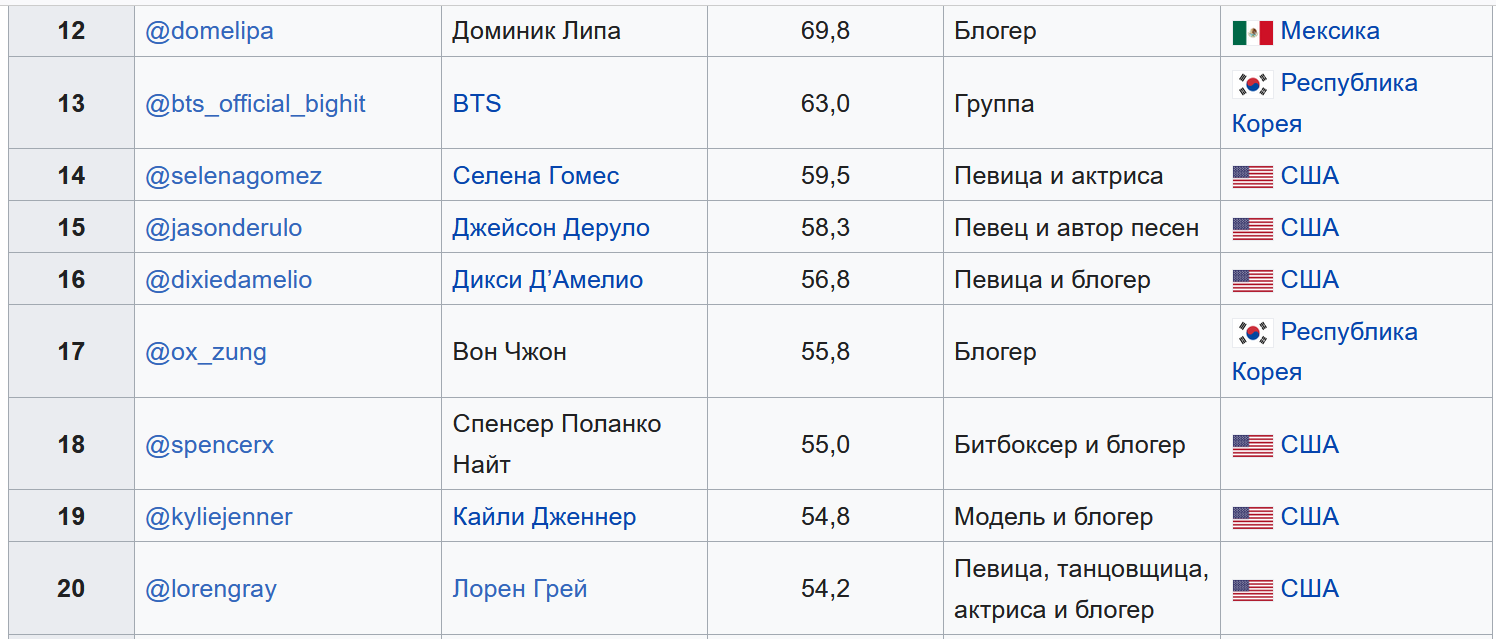

(Статистика YouTube и TikTok за 2023 год)

Сразу можно заметить, что в топ-5 входит аккаунт под названием "mrbeast", его же канал на YouTube занимает 3 место по количеству подписчиков. В тиктоке у него 88,3 млн подписчиков, на YouTube - 166 млн человек.

Самый популярный аккаунт в TikTok у Хаби Лейма (162,1 млн подписчиков), однако его канал на YouTube не входит в наш датасет (в топ-995 каналов).

Самый популярный канал на YouTube имеет 245 млн подписчиков (для сравнения).

Каналы Чарли Д’Амелио, Беллы Порч, Эддисон Рей, Бурака Оздемира, Уилла Смита так же не входят в топ-995 каналов на YouTube.

Канал Зака Кинга на YouTube занимает 367 место с 20,7 млн подписчиков (однако после фильтрации данных его канал не отображается)

Канал Кимберли Лоайсы на YouTube занимает 662 место с 15,1 млн подписчиков.

In [50]:
df[df['Youtuber'] == 'Zach King']

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude,yearly_earnings


In [51]:
df[df['Youtuber'] == 'Kim Loaiza']

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude,yearly_earnings
661,662,Kim Loaiza,15100000,1.576633e+09,Music,Kim Loaiza,18,NaN,NaN,Music,...,2019.0,Jan,18.0,NaN,NaN,NaN,NaN,NaN,NaN,689100.0


In [52]:
df.head(10)

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude,yearly_earnings
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880,57600000.0
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,34350000.0
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,50350000.0
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880,46500000.0
6,7,ýýý Kids Diana Show,112000000,9.324704e+10,People & Blogs,ýýý Kids Diana Show,1111,United States,US,Entertainment,...,2015.0,May,12.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,18650000.0
7,8,PewDiePie,111000000,2.905804e+10,Gaming,PewDiePie,4716,Japan,JP,Entertainment,...,2010.0,Apr,29.0,63.2,1.262266e+08,2.29,115782416.0,36.204824,138.252924,1008800.0
8,9,Like Nastya,106000000,9.047906e+10,People & Blogs,Like Nastya Vlog,493,Russia,RU,People,...,2016.0,Jan,14.0,81.9,1.443735e+08,4.59,107683889.0,61.524010,105.318756,1223400.0
9,10,Vlad and Niki,98900000,7.718017e+10,Entertainment,Vlad and Niki,574,United States,US,Entertainment,...,2018.0,Apr,23.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,14800000.0
10,11,Zee Music Company,96700000,5.785629e+10,Music,Zee Music Company,8548,India,IN,Music,...,2014.0,Mar,12.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880,20500000.0
11,12,WWE,96000000,7.742847e+10,Sports,WWE,70127,United States,US,Sports,...,2007.0,May,11.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,18200000.0


Rutube – российский видеохостинг с аудиторией 40 млн пользователей в месяц. Rutube был создан в 2006 году Олегом Волобуевым и Михаилом Паулкиным, предпринимателями из города Орел. Сейчас Rutube управляется компанией ООО «Руформ» и находится в цифровых активах холдинга «Газпром-медиа».

Кроме видеоконтента блогеров зрителям Rutube доступны фильмы, сериалы, мультфильмы, шоу и телевизионные передачи.
В 2024 году аудитория видеохостинга Rutube составляет более 40.4 млн человек в месяц. Это на 57.45% больше чем в 2022 году.
В апреле 2023 года на Rutube было зарегистрировано 23 млн человек.
За последние три года аудитория Rutube выросла в 13 раз.
В 2023 году Rutube был на первом месте по приросту аудитории, количество пользователей национального видеохостинга тогда увеличилось на 53.7%.

Видео-платформу Rutube используют 27.6% россиян каждый месяц.
Самым популярным блогером в Rutube является Дмитрий Пучков с 288 тысячами подписчиков в 2024 году. На втором месте Debauchery Food (142 тыс. подписчиков).


Б) Найдите данные о доступности ресурсов видеохостинга и показателях скорости работы интернета в разных странах. В каких странах есть потенциал для роста популярности видеохостинга?

Согласно официальным данным YouTube, сервис доступен в более чем 100 странах мира и поддерживает 80 языков. YouTube регулярно публикует статистику об активности пользователей и доступности платформы.
По последним данным:
- Ежедневно на YouTube загружается более 500 часов видеоконтента
- Платформа имеет более 2 миллиардов активных пользователей в месяц
- Среднее время просмотра на устройство составляет более 1 часа в день

Что касается доступности, YouTube старается обеспечить бесперебойную работу сервиса во всем мире. Однако возможны кратковременные перебои в работе, связанные с техническими неполадками или проблемами с Интернет-соединением.

На фотографии видна активность пользователей в течение дня.

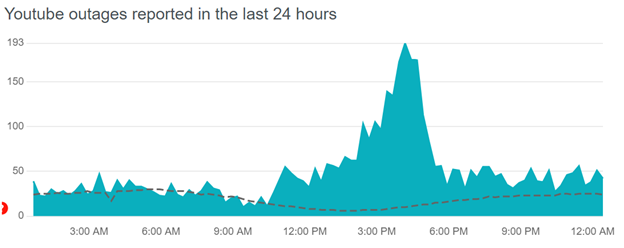

 Для того, чтобы комфортно пользоваться видеохостингом YouTube необходимо соблюдать следующие критерии:

•	Последняя версия браузера Google Chrome, Firefox или Safari или обновленное приложение YouTube.

•	Интернет-подключение со скоростью не менее 500 кбит/с (это соответствует разрешению 240р).

Ниже приведены данные о статистике скорости интернета в разных странах. На основании этой информации можно сделать вывод о том, что во всех приведенных ниже странах возможно достаточно комфортно пользоваться видеохостингом YouTube.

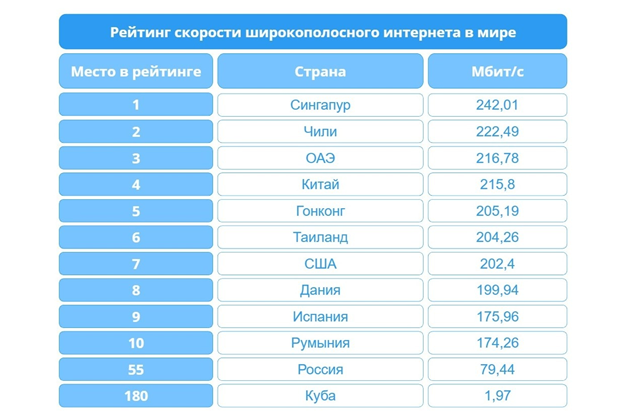

Согласно аналитическим данным, существует страны, где у YouTube есть большой потенциал для роста популярности и увеличения аудитории:

1. Индия - Индия является вторым по величине рынком YouTube после США. Однако, уровень проникновения платформы все еще относительно низкий, учитывая огромную численность населения страны. Поэтому у YouTube есть большие возможности для дальнейшего роста аудитории в Индии.

2. Бразилия - Бразилия является одним из ключевых рынков YouTube в Латинской Америке. Несмотря на высокие показатели использования платформы, есть пространство для увеличения охвата и вовлеченности аудитории.

3. Индонезия - YouTube пользуется большой популярностью в Индонезии, но уровень проникновения все еще не максимален. Рост интернет-аудитории и смартфонизация страны открывает большие перспективы для YouTube.

4. Нигерия - Африканский рынок в целом представляет большой интерес для YouTube. В частности, Нигерия с растущим молодым населением и развивающейся интернет-инфраструктурой имеет значительный потенциал роста.

5. Мексика - Мексика является вторым по величине рынком YouTube в Латинской Америке после Бразилии. YouTube сохраняет хорошие показатели, но все еще есть возможности для наращивания аудитории.

Таким образом, ключевыми странами, где у YouTube есть большие перспективы для дальнейшего роста, являются развивающиеся рынки Азии, Африки и Латинской Америки с быстро растущей интернет-аудиторией и высоким уровнем проникновения мобильных устройств.

Информация взята из отчетов аналитической компании Statista, материалов исследовательской компании eMarketer и аналитики YouTube Creator Academy.